# Analysing Start-up Funding Trend

The purpose of this analysis is to find trends among start-ups in recent years.

The dataset consists of company information with the following columns:
1. Organization Name  
2. Organization Name URL  
3. Headquarters Location  
4. Industries  
5. Last Funding Type  
6. Last Funding Date  
7. Last Funding Amount  
8. Last Funding Amount Currency  
9. Last Funding Amount Currency (in USD)  
10. Number of Employees  
11. Price Currency  
12. Company Type  
13. Founded Date  
14. Twitter  
15. Facebook  
16. LinkedIn  
17. Funding Status  
18. Acquisition Type  
19. Announced Date  
20. Estimated Revenue Range  

## 1. Import File and Relevant Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# import data
data = pd.read_csv('HP Business Analytics Dataset.csv')

# check the first few rows of the data
print(data.head())

  Organization Name                              Organization Name URL  \
0             Nexar    https://www.crunchbase.com/organization/nexar-2   
1           Medable  https://www.crunchbase.com/organization/medabl...   
2          Instabox   https://www.crunchbase.com/organization/instabox   
3           Triller    https://www.crunchbase.com/organization/triller   
4           OPSkins    https://www.crunchbase.com/organization/opskins   

                     Headquarters Location  \
0               Tel Aviv, Tel Aviv, Israel   
1     Palo Alto, California, United States   
2       HÃ¤gersten, Stockholms Lan, Sweden   
3        New York, New York, United States   
4  Santa Monica, California, United States   

                                          Industries  \
0  Apps, Autonomous Vehicles, Internet, Sensor, T...   
1  Developer APIs, Health Care, Medical, Medical ...   
2       Logistics, Shipping, Supply Chain Management   
3               Digital Media, Music, Social Network  

In [19]:
# count the number of rows and columns in the data
print(data.shape)

(21528, 32)


In [20]:
# check the data types of the columns
print(data.dtypes)

Organization Name                          object
Organization Name URL                      object
Headquarters Location                      object
Industries                                 object
Last Funding Type                          object
Last Funding Date                          object
Last Funding Amount                       float64
Last Funding Amount Currency               object
Last Funding Amount Currency (in USD)     float64
Number of Employees                        object
Total Funding Amount                      float64
Total Funding Amount Currency              object
Total Funding Amount Currency (in USD)    float64
Number of Funding Rounds                  float64
Acquisition Status                         object
Acquired by                                object
Acquired by URL                            object
Number of Acquisitions                    float64
Acquisition Price Currency (in USD)       float64
Number of Founders                        float64


## 2. Dataset Preparation

In [21]:
# check for missing values
print(data.isnull().sum())

Organization Name                             2
Organization Name URL                         0
Headquarters Location                      1980
Industries                                  168
Last Funding Type                          9055
Last Funding Date                          9055
Last Funding Amount                       11604
Last Funding Amount Currency              11604
Last Funding Amount Currency (in USD)     11604
Number of Employees                        1548
Total Funding Amount                      10490
Total Funding Amount Currency             10490
Total Funding Amount Currency (in USD)    10490
Number of Funding Rounds                   9055
Acquisition Status                        20462
Acquired by                               21164
Acquired by URL                           21164
Number of Acquisitions                    20797
Acquisition Price Currency (in USD)       21475
Number of Founders                         5409
Unnamed: 20                             

In [22]:
# remove irrelevant columns
data = data.drop(['Unnamed: 20'], axis=1)


In [23]:
# check the new columns
print(data.columns)

Index(['Organization Name', 'Organization Name URL', 'Headquarters Location',
       'Industries', 'Last Funding Type', 'Last Funding Date',
       'Last Funding Amount', 'Last Funding Amount Currency',
       'Last Funding Amount Currency (in USD)', 'Number of Employees',
       'Total Funding Amount', 'Total Funding Amount Currency',
       'Total Funding Amount Currency (in USD)', 'Number of Funding Rounds',
       'Acquisition Status', 'Acquired by', 'Acquired by URL',
       'Number of Acquisitions', 'Acquisition Price Currency (in USD)',
       'Number of Founders', 'Acquisition Price', 'Price Currency',
       'Company Type', 'Founded Date', 'Twitter', 'Facebook', 'LinkedIn',
       'Funding Status', 'Acquisition Type', 'Announced Date',
       'Estimated Revenue Range'],
      dtype='object')


In [24]:
# Drop columns with excessive missing values (e.g., more than 50% missing)
threshold = len(data) * 0.5

cleaned_data = data.dropna(thresh=threshold, axis=1)

print(cleaned_data.columns)

Index(['Organization Name', 'Organization Name URL', 'Headquarters Location',
       'Industries', 'Last Funding Type', 'Last Funding Date',
       'Number of Employees', 'Total Funding Amount',
       'Total Funding Amount Currency',
       'Total Funding Amount Currency (in USD)', 'Number of Funding Rounds',
       'Number of Founders', 'Company Type', 'Founded Date', 'Twitter',
       'Facebook', 'LinkedIn', 'Estimated Revenue Range'],
      dtype='object')


In [12]:
# check the new shape of the data
print(cleaned_data.shape)



(21528, 18)


In [25]:
# drop missing organizations name and industry

cleaned_data = cleaned_data.dropna(subset=['Organization Name', 'Industries'])

In [26]:
# remove columns that are not needed for analysis
cleaned_data = cleaned_data.drop(['Twitter', 'Facebook', 'LinkedIn', 'Total Funding Amount Currency'], axis=1)

In [27]:
# check missing values again
print(cleaned_data.isnull().sum())

Organization Name                             0
Organization Name URL                         0
Headquarters Location                      1912
Industries                                    0
Last Funding Type                          8917
Last Funding Date                          8917
Number of Employees                        1514
Total Funding Amount                      10341
Total Funding Amount Currency (in USD)    10341
Number of Funding Rounds                   8917
Number of Founders                         5298
Company Type                               4965
Founded Date                                  0
Estimated Revenue Range                       0
dtype: int64


In [28]:
# Create a new dataframe with only complete rows (no missing values)
complete_data = cleaned_data.dropna()

In [31]:
complete_data.shape

(8948, 14)

## 3. Complete Data Analysis

In [39]:
# Check the correlation between the numerical variables
numerical_data = complete_data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                                        Total Funding Amount  \
Total Funding Amount                                1.000000   
Total Funding Amount Currency (in USD)              0.445331   
Number of Funding Rounds                            0.073199   
Number of Founders                                 -0.007822   

                                        Total Funding Amount Currency (in USD)  \
Total Funding Amount                                                  0.445331   
Total Funding Amount Currency (in USD)                                1.000000   
Number of Funding Rounds                                              0.161417   
Number of Founders                                                    0.014171   

                                        Number of Funding Rounds  \
Total Funding Amount                                    0.073199   
Total Funding Amount Currency (in USD)                  0.161417   
Number of Funding Rounds                                1.000000

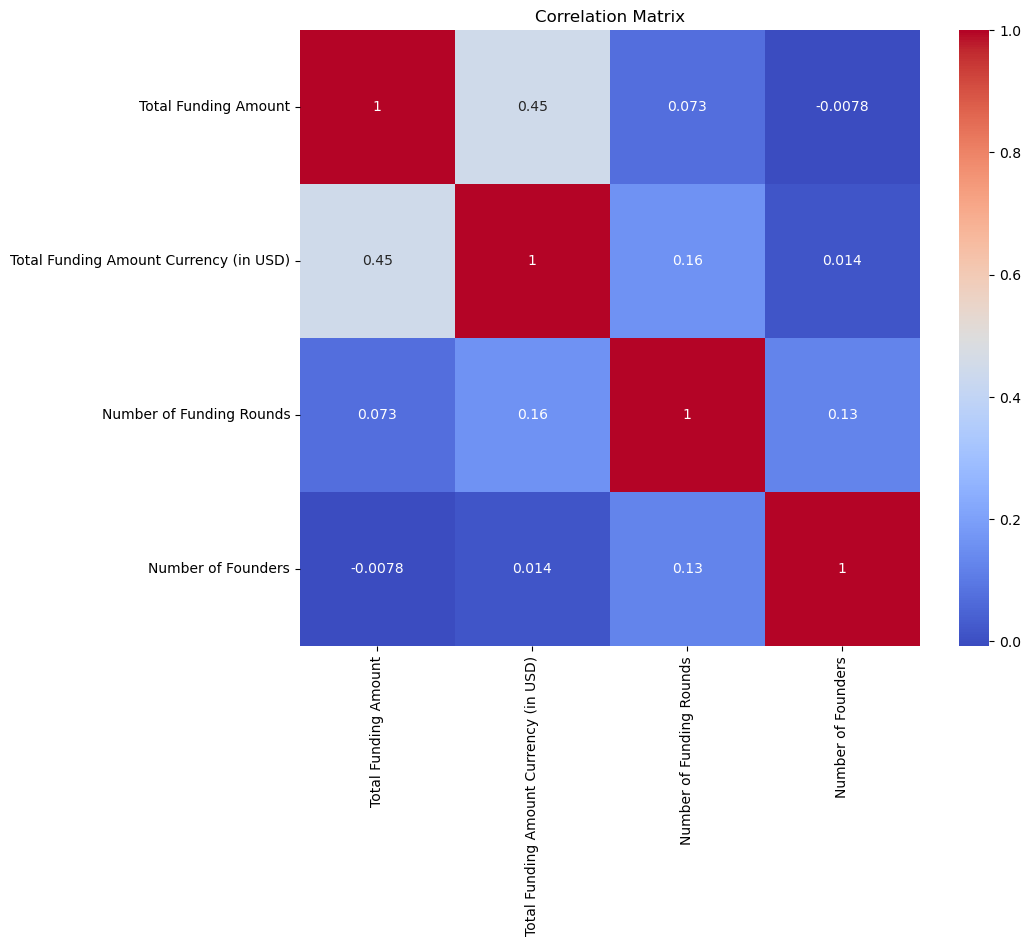

In [40]:
# Visualize the correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Conclusion:
1. No Strong Correlations: None of the correlations are strong (close to 1 or -1). Most are very weak or weak, indicating that there are no strong linear relationships between the variables in the dataset.
2. Potential Implications: This lack of strong correlations suggests that other factors not included in the numeric dataset may play a more significant role in influencing these variables. It may also indicate that the relationships are non-linear, or there may be complex interactions between multiple variables that are not captured by simple pairwise correlations.

## 4. Predictive Modeling

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

numeric_columns = ['Total Funding Amount', 'Number of Funding Rounds', 'Number of Founders']

# Define the features and target variable
X = complete_data[numeric_columns].drop('Total Funding Amount', axis=1)
y = complete_data['Total Funding Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
print("Model R^2 score:", model.score(X_test, y_test))


Model R^2 score: 0.0007323761121593719


A Model R² score of 0.0007 indicates that the linear regression model is not effectively capturing the relationship between the predictors (Number of Funding Rounds, Number of Founders) and the target variable (Total Funding Amount). This suggests that these features alone are not sufficient to predict the Total Funding Amount accurately.